In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [16]:
current_directory = os.getcwd
print(current_directory)

<built-in function getcwd>


In [17]:
new_directory_path = r"C:\Users\ircal\Desktop\Coding\Health Python"
os.chdir(new_directory_path)

In [18]:
updated_dir = os.getcwd()
print(updated_dir)

C:\Users\ircal\Desktop\Coding\Health Python


In [19]:
filepath = 'Week14Assignment.txt'
df = pd.read_csv(filepath)

In [20]:
print(df.columns)

Index(['PatientID', ' Readmission', ' StaffSatisfaction',
       ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction',
       ' CommunicationSatisfaction'],
      dtype='object')


In [21]:
#Calculating Statistics 
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_staff = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_staff = np.mean(df[' FoodSatisfaction'])
satisfaction_staff = np.mean(df[' ComfortSatisfaction'])
satisfaction_staff = np.mean(df[' CommunicationSatisfaction'])

In [22]:
#Printing out Descriptive Statistics
print(f"Number of patients readmited : {num_readmitted}.")
print(f"Average Staff Satisfaction: {satisfaction_staff}.")
print(f"Average Cleanliness  Satisfaction: {satisfaction_staff}.")
print(f"Average Food Satisfaction: {satisfaction_staff}.")
print(f"Average Confort Satisfaction: {satisfaction_staff}.")
print(f"Average Communications Satisfaction: {satisfaction_staff}.")

Number of patients readmited : 15.
Average Staff Satisfaction: 3.7.
Average Cleanliness  Satisfaction: 3.7.
Average Food Satisfaction: 3.7.
Average Confort Satisfaction: 3.7.
Average Communications Satisfaction: 3.7.


{'whiskers': [<matplotlib.lines.Line2D at 0x2f3f4d50e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2f3fa361650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f3fa79b050>],
 'medians': [<matplotlib.lines.Line2D at 0x2f3f4de2710>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f3f4de2f90>],
 'means': []}

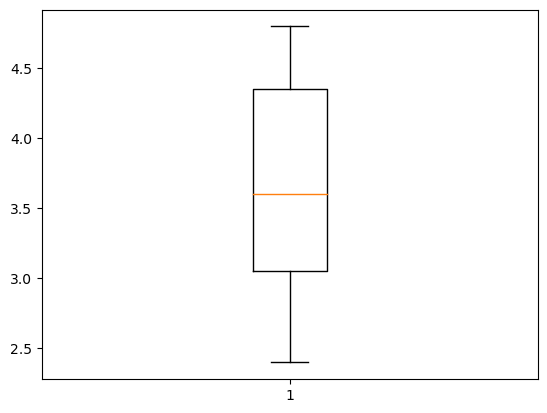

In [23]:
#Calculate Overall Satisfaction
df = df.convert_dtypes()
df[' OverallSatisfaction'] = df[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction', ' CommunicationSatisfaction']].mean(axis = 1)
plt.boxplot(df[' OverallSatisfaction'], showfliers = True)

In [24]:
#Logistic Regression 
x = df[' OverallSatisfaction'].values.reshape(-1, 1)
y = df[" Readmission"]

log_reg = LogisticRegression().fit(x, y)

In [25]:
#Correlation Results 

correlation_coefficient = log_reg.coef_[0][0]

if correlation_coefficient > 0:
    print("Logistic regression results indicated a: ")
    if correlation_coefficient > 0.5 :
        print("Moderate Correlation")
    elif correlation_coefficient > 0.7:
        print("Strong Correlation")
    else:
        print("Weak Correlation")
else:
    print("Logistic Regression Results Indicated:")
    print("No Correlation")

print(f"Correlation Coefficient was: {correlation_coefficient}.")

Logistic regression results indicated a: 
Weak Correlation
Correlation Coefficient was: 0.3362278182798735.


(2.0, 5.0)

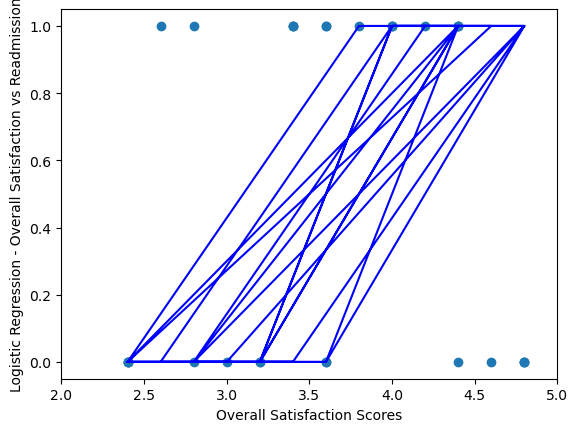

In [26]:
#Plotting the data 
plt.scatter(x, y)
plt.xlabel("Overall Satisfaction Scores")
plt.ylabel("Logistic Regression - Overall Satisfaction vs Readmission")
plt.plot(x, log_reg.predict(x), color = 'blue')
plt.xlim(2, 5)